This script demonstrates the k-means algorithm.

Name : So-Jeong An

Student ID : 2018120203

# Create random data

In [1]:
from random import *
import random
import numpy as np
from matplotlib import pyplot as plt

data = []
totaldata = []

def generatePointCluster(k, n):
    for i in range(0, n):
        dataX = randint(1, 100) # 1부터 100 사이의 임의의 정수
        dataY = randint(1, 100)
        data.append([dataX, dataY])
    return (data)
    
generatePointCluster(2, 20)

[[92, 66],
 [35, 18],
 [57, 1],
 [30, 91],
 [76, 55],
 [27, 4],
 [98, 7],
 [88, 29],
 [19, 97],
 [76, 64],
 [16, 78],
 [72, 77],
 [71, 37],
 [88, 13],
 [58, 11],
 [61, 41],
 [29, 90],
 [65, 5],
 [92, 62],
 [75, 58]]

# Create random label

In [2]:
def initialiseLabel(k, n):
    for i in range(0, n):
        labels = randint(0, k-1)
        totaldata.append((data[i],labels))
    return (totaldata)

initialiseLabel(2, 20)

[([92, 66], 1),
 ([35, 18], 1),
 ([57, 1], 1),
 ([30, 91], 1),
 ([76, 55], 0),
 ([27, 4], 0),
 ([98, 7], 1),
 ([88, 29], 1),
 ([19, 97], 0),
 ([76, 64], 1),
 ([16, 78], 1),
 ([72, 77], 1),
 ([71, 37], 1),
 ([88, 13], 1),
 ([58, 11], 0),
 ([61, 41], 1),
 ([29, 90], 0),
 ([65, 5], 0),
 ([92, 62], 1),
 ([75, 58], 1)]

# Compute centroid points

In [23]:
centroids = []

def computeCentroid(k):
    print(len(totaldata))
    for i in range(0, k):
        centroid_X = []
        centroid_Y = []
        centroid = []
        for j in range(0, len(totaldata)):
            if(totaldata[j][1]==i):
                centroid_X.append(int(data[j][0]))
                centroid_Y.append(int(data[j][1]))
            centroid = [np.mean(centroid_X, dtype=np.float16), np.mean(centroid_Y, dtype=np.float16)]
        centroids.append(centroid)
    return (centroids)

computeCentroid(2)

20


C:\Users\My\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\My\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


[[45.66, 43.66], [67.94, 45.84]]

# Compute Distance

In [24]:
def computeDistance(data,centroid): #data와 중심점 거리 계산
    xdistance = (data[0] - centroid[0]) ** 2
    ydistance = (data[1] - centroid[1]) ** 2
    sum = xdistance+ydistance
    return np.sqrt(sum)

# Assign label of shortest distance

In [25]:
#generatePointCluster(2, 20)
#initialiseLabel(2, 20)
#computeCentroid(2)
distancearray = []

def assignLabel(n):
    distance = []
    totaldata = []
    for i in range(0, n):
        shortest = 10000
        for j in range(0, len(centroids)):

            distance = computeDistance(data[i],centroids[j])
            distancearray.append(distance)

            if(distance < shortest):
                shortest = distance
                shortest_label = j
                
        totaldata.append((data[i], shortest_label))
    
    return (totaldata)

assignLabel(20)

[([92, 66], 1),
 ([35, 18], 0),
 ([57, 1], 0),
 ([30, 91], 0),
 ([76, 55], 1),
 ([27, 4], 0),
 ([98, 7], 1),
 ([88, 29], 1),
 ([19, 97], 0),
 ([76, 64], 1),
 ([16, 78], 0),
 ([72, 77], 1),
 ([71, 37], 1),
 ([88, 13], 1),
 ([58, 11], 0),
 ([61, 41], 1),
 ([29, 90], 0),
 ([65, 5], 1),
 ([92, 62], 1),
 ([75, 58], 1)]

In [26]:
def computeEnergy():
    energy = 0
    for i in range(0, len(distancearray)):
        energy += distancearray[i] ** 2
    return energy
    
computeEnergy()

72783.60546875

# Data visualize 

20


C:\Users\My\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\My\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


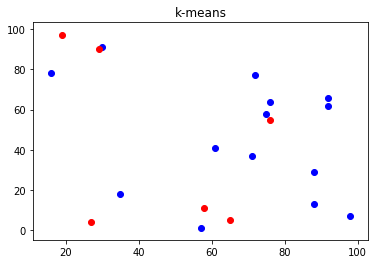

In [40]:
computeCentroid(2)
assignLabel(20)


import numpy as np
import matplotlib.pyplot as plt

for i in range(0, len(data)):
    x = np.array(data[i][0])
    y = np.array(data[i][1])
    if(totaldata[i][1] == 0):
        label = 'red'
    else:
        label = 'blue'
    plt.scatter(x, y, color = label)

plt.title('k-means')
plt.show()